In [107]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/camilousa/datasets/master/german_credit_data(2)(1).csv')

df.head()

,id,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


##  ¿Existen diferencias significativas en el monto y duración de los créditos entre hombres y mujeres?

In [109]:
count_sex = df.groupby("Sex")[["Credit_amount"]].agg("count")
count_sex = count_sex.reset_index() 
display(count_sex)

,Sex,Credit_amount
0,female,310
1,male,690


El conteo de registros por género en la variable *Credit_amount* muestra una gran diferecia en el número de registros, esto puede reflejar que el 69%creditos fueron solicitados por hombres y tan solo el 31% por mujeres. Esta diferencia puede estar relacionada con factores demográficos, socioculturales o económicos que influyen en el acceso y la demanda de productos financieros.

In [110]:
promedios = df.groupby("Sex")[["Credit_amount", "Duration"]].agg(["mean", "std"])
promedios.columns = ['_'.join(col) for col in promedios.columns]
promedios = promedios.reset_index()  
display(promedios)




,Sex,Credit_amount_mean,Credit_amount_std,Duration_mean,Duration_std
0,female,2877.774194,2603.141613,19.43871,11.048047
1,male,3448.040580,2900.483807,21.56087,12.437941


Los datos muestran que los hombres solicitan en promedio créditos más altos que las mujeres, lo que equivale aproximadamente a un 19.8% más que las mujeres y también a plazos más largos con una diferencia del 10.9%. Además, la variabilidad en las solicitudes masculinas es mayor con desviaciones estándar más altas tanto en el monto como en la duración, esto quiere decir que tienden a pedir más dinero, con mayor duración y con una mayor diversidad en los valores solicitados.

In [111]:
def outliers(df, columna_grupo, columna_valor):
    resultados = []
    for grupo, datos in df.groupby(columna_grupo)[columna_valor]:
        Q1 = datos.quantile(0.25)
        Q3 = datos.quantile(0.75)
        IQR = Q3 - Q1
        limite_sup = Q3 + 1.5 * IQR
        limite_inf = Q1 - 1.5 * IQR
        outliers = datos[(datos < limite_inf) | (datos > limite_sup)].values

        resultados.append({
            columna_grupo: grupo,
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "outlier inferior": limite_inf,
            "outlier superior": limite_sup,
        })
    tabla = pd.DataFrame(resultados)
    display(tabla)

In [112]:
outliers(df, "Sex", "Credit_amount")

,Sex,Q1,Q3,IQR,outlier inferior,outlier superior
0,female,1247.5,3606.50,2359.00,-2291.000,7145.000
1,male,1442.5,4266.25,2823.75,-2793.125,8501.875


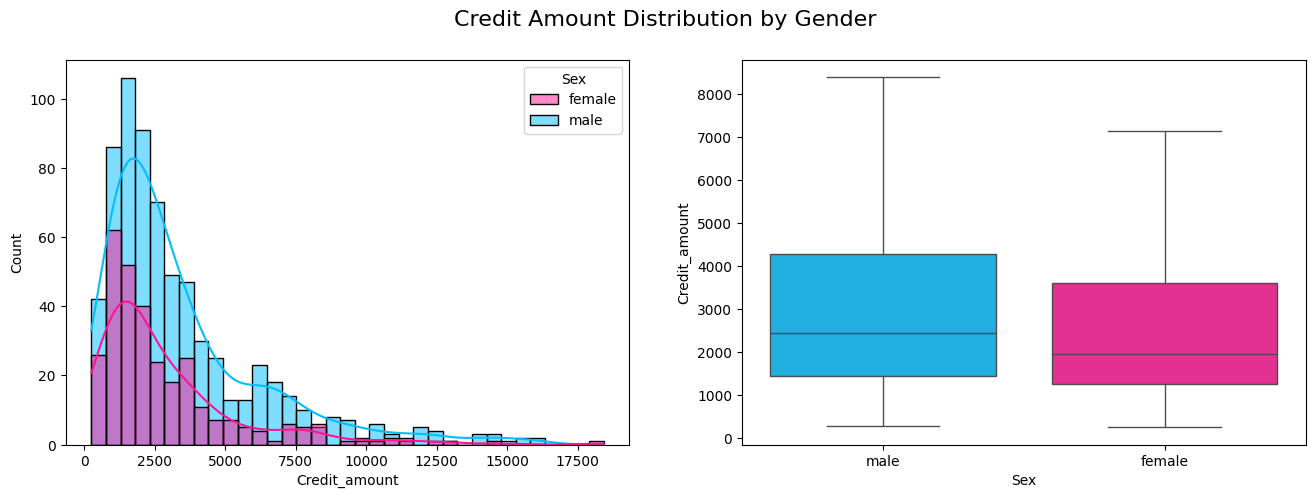

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, 
             x='Credit_amount', 
             hue="Sex", 
             kde=True, 
             ax=axes[0], 
             hue_order=["female", "male"],palette={"female": "deeppink","male": "deepskyblue"}, 
             edgecolor='black'
)

sns.boxplot(
    data=df,
    x='Sex',
    y='Credit_amount',
    hue='Sex', 
    ax=axes[1],
    showfliers=False,
    palette={"male": "deepskyblue", "female": "deeppink"},
    legend=False  
)

plt.suptitle('Credit Amount Distribution by Gender', fontsize=16)
plt.show()




El histograma muestra que los hombres tienden a solicitar montos de crédito más altos y con una distribución más dispersa en comparación con las mujeres. Se peude ver que los dos generos concentran la mayor parte de solicitudes en rangos bajos alrededor de 1,000 a 3,000, pero la curva masculina presenta una cola más larga hacia montos elevados, indicando que los créditos mas altos se encuentran principalmente en hombres.

El diagrama de caja confirma que la mediana del monto solicitado por hombres es mayor que la de las mujeres y que su rango intercuartílico es más amplio además de tener valores atípicos más altos, lo que confirma lo dicho anteriormente que existe una mayor variabilidad y presencia de solicitudes de crédito de alto valor en hombres.

In [114]:
outliers(df, "Sex", "Duration")

,Sex,Q1,Q3,IQR,outlier inferior,outlier superior
0,female,12.0,24.0,12.0,-6.0,42.0
1,male,12.0,27.0,15.0,-10.5,49.5


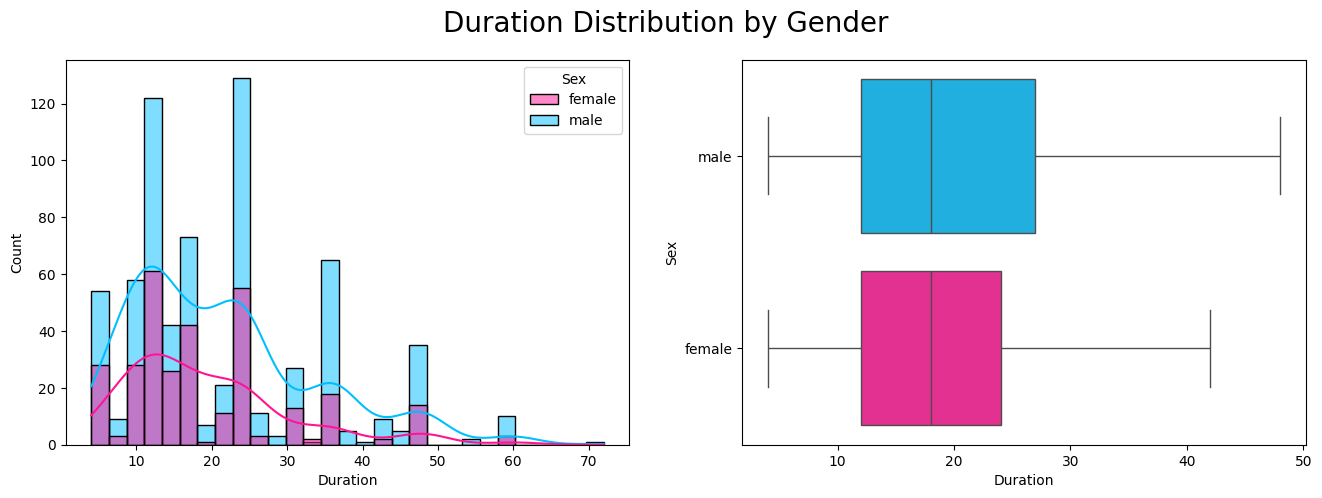

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(data=df, 
             x='Duration', 
             hue="Sex", 
             kde=True, 
             ax=axes[0],
             hue_order=["female", "male"], 
             palette={"male": "deepskyblue", "female": "deeppink"}, 
             edgecolor='black'
)
sns.boxplot(data=df, 
            x='Duration', 
            y='Sex', 
            hue="Sex", 
            ax=axes[1], 
            showfliers=False, 
            palette={"male": "deepskyblue", "female": "deeppink"})

plt.suptitle('Duration Distribution by Gender', fontsize=20)
plt.show()

La distribución de la duración de los créditos muestra que tanto hombres como mujeres tienen sus solicitudes en plazos cortos y medianos entre 6 y 24 meses, pero los hombres presentan una mayor dispersión y un rango más amplio. El histograma evidencia que, aunque la mayor frecuencia para ambos sexos está en plazos cercanos a 12 y 24 meses, los hombres tienen más casos en plazos largos incluso superiores a 40 meses. 

El diagrama de caja confirma que la mediana de duración es un poco mayor en hombres, con un rango intercuartílico más amplio y valores atípicos que alcanzan duraciones mucho mayores que en las mujeres. Es decir, que los hombres tienden a solicitar créditos a plazos más prolongados y variados.


### **Conclusión:**

Si existen diferencias significativas en el monto y la duración de los créditos solicitados por hombres y mujeres. Los hombres son más activos en la solicitud de créditos, también tienden a solicitar montos y plazos más altos con una mayor variabilidad en ambos aspectos. Mientras que las mujeres presentan patrones más moderados en las solicitudes que realizan. Se puede inferir que las diferencias pueden estar asociadas a factores socioeconómicos, culturales y la actividad en la vida acrediticia. En conclusión, el género sí influye de manera significativa en el comportamiento crediticio dentro del conjunto de datos analizados.


## ¿Qué categorías de cuenta corriente son más frecuentes en los distintos rangos de edad?

In [121]:
bins = [19, 29, 39, 49, 59, 69, 79]
labels = ['19-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
count_table = df.groupby(['Checking_account', 'Age_range'], observed=False).size().unstack('Age_range', fill_value=0)
count_table.index.name = None
display(count_table)

Age_range,19-29,30-39,40-49,50-59,60-69,70-79
little,115,73,49,23,12,2
moderate,112,93,38,12,12,2
rich,24,17,13,5,3,1


La mayoría de personas en todos los rangos de edad tienen cuentas tipo little, mientras que son pocas las personas con cuenta corriente de tipo rich. El rango de edad de 30-39 años destaca por tener mayor cantidad de cuentas moderate que little algo que no ocurre en otros rangos. Los jóvenes mas o menos contemplado entre 18-39 tienen la mayor parte de la población y se evidencia un balance con poca diferencia entre little y moderate, por otro lado en edades mayores la cantidad total disminuye y la distribución es más equilibrada aunque la categoría rich sigue siendo el que menos poblacion tiene en todos los tipos de cuenta.

In [117]:

stats = df.groupby(['Age_range', 'Checking_account'], observed=False)['Age'].agg(['mean', 'std']).round(2)
stats['mean_std'] = stats['mean'].astype(str) + ' ± ' + stats['std'].astype(str)
stats_pivot = stats['mean_std'].unstack('Age_range', fill_value='')
stats_pivot.index.name = None
display(stats_pivot)

Age_range,19-29,30-39,40-49,50-59,60-69,70-79
little,24.9 ± 2.57,34.1 ± 3.0,44.1 ± 2.84,54.35 ± 2.72,64.08 ± 2.47,75.0 ± 0.0
moderate,25.08 ± 2.52,33.84 ± 2.8,43.66 ± 3.13,53.92 ± 3.32,63.5 ± 3.12,72.0 ± 2.83
rich,25.54 ± 2.3,35.24 ± 2.41,45.62 ± 3.07,53.8 ± 3.11,65.0 ± 1.73,74.0 ± nan


Dentro de cada rango las personas con cuentas little, moderate o rich tienen edades muy similares; por ejemplo, en 18-29 están cerca de los 25 años, en 40-49 están sobre los 44-46 años y en 60-69 alcanzan los 63-66 años, lo que indica que el tipo de cuenta no depende tanto de la edad sino posiblemente de otros factores como ingresos, tipos de trabajo o hábitos financieros.

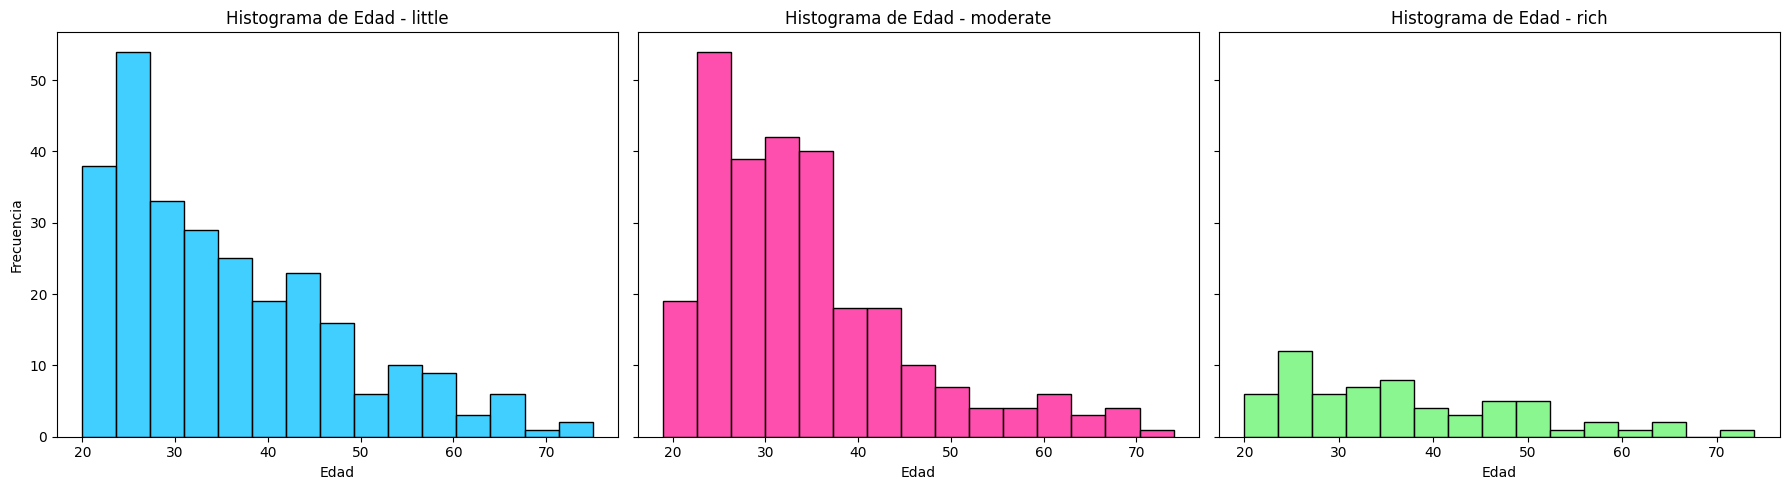

In [118]:

colores = {"little": "deepskyblue", "moderate": "deeppink", "rich": "#63F36A"}
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
for i, tipo in enumerate(['little', 'moderate', 'rich']):
    datos = df[df['Checking_account'] == tipo]
    sns.histplot(data=datos, x='Age', color=colores[tipo], ax=axes[i], edgecolor='black', bins=15)
    axes[i].set_title(f'Histograma de Edad - {tipo}')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()




**Análisis de histogramas**  
La mayoría de personas con cuentas little se concentran entre los 20 y 30 años con un pico en los 25 años aproximadamente.  
En el caso de moderate la distribución se mantiene alta hasta los 37 años mas o menos.  
Las cuentas rich son menos frecuentes en todos los tramos y están más repartidas a lo largo de las edades, aunque con presencia más notoria entre los 25 y 45 años.
  
La cantidad de personas disminuye a medida que aumenta la edad pero a partir de los 60 años en las tres categorías inicia a disminuir con mayor intensidad. Es decir que las cuentas más comunes en edades jóvenes son little y moderate,aunque las rich no muestran una concentración marcada en un rango específicosi no una distribución mas dispersa y sin un patrón como tal.

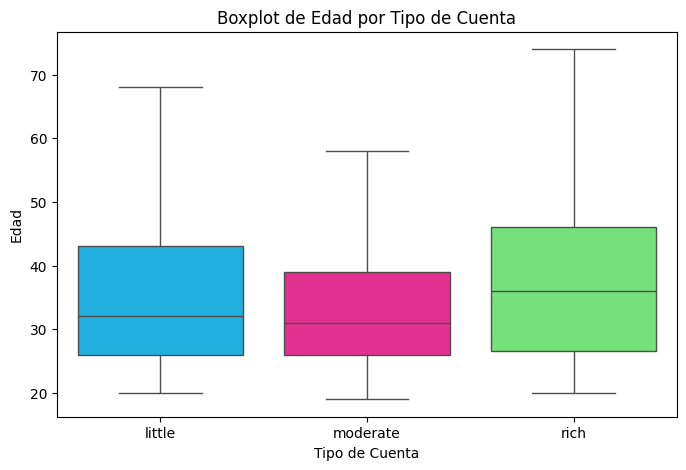

,Checking_account,Q1,Q3,IQR,outlier inferior,outlier superior
0,little,26.0,43.0,17.0,0.50,68.50
1,moderate,26.0,39.0,13.0,6.50,58.50
2,rich,26.5,46.0,19.5,-2.75,75.25


In [119]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Checking_account', y='Age', hue='Checking_account', palette=colores, showfliers=False, legend=False)
plt.title('Boxplot de Edad por Tipo de Cuenta')
plt.xlabel('Tipo de Cuenta')
plt.ylabel('Edad')
plt.show()

outliers(df, 'Checking_account', 'Age')# Im

**Análisis de boxplot**  
Las edades promedio son muy similares entre los tres tipos de cuenta, aunque las rich tienen una mediana un poco más alta que las little y moderate.  
En las cuentas rich se observa una mayor dispersión de edades con personas desde los 19 o 20 años hasta más de 70, mientras que las moderate presentan el rango más pequeño.  
Las little tienen un rango intercuartílico más amplio que las moderate pero menor que las rich.  


### **Conclusión**

Las categorías de cuenta corriente más frecuentes varían según la edad pero en general las little y moderate predominan en los grupos más jóvenes contemplados entre los 20 y 30 años, mientras que las rich son menos comunes y se distribuyen de forma más dispersa a lo largo de las edades.  
A medida que aumenta la edad, la cantidad de personas con cualquier tipo de cuenta disminuye siendo más notoria la caída después de los 60 años. Pero teniendo en cuenta los analisis y las graficas se puede decir que el tipo de cuenta no depende de forma marcada de la edad ya que en todos los rangos se encuentran las tres categorías pero con diferentes proporciones.
